<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning & Deep Learning</b></center>
<center><b><h1>Malay Panara | 23010101184 | 24-12-2025</h1></b></center>
<center><b><h1>Lab - 5</b></center>    
<pre>    

# SVR

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd

# Read World bank CSV

In [2]:
df=pd.read_csv("WorldBank.csv")
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,India,IND,Export value index (2000 = 100),TX.VAL.MRCH.XD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.147485e+02,7.004085e+02,7.429281e+02,7.614417e+02,6.322694e+02,6.242250e+02,7.061028e+02,7.663608e+02,NaN,NaN
1,India,IND,Insurance and financial services (% of commerc...,TX.VAL.INSF.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,6.403614e+00,5.246771e+00,5.729495e+00,5.060904e+00,4.706801e+00,4.471147e+00,3.760466e+00,3.921611e+00,3.438072e+00,NaN
2,India,IND,"Merchandise imports by the reporting economy, ...",TM.VAL.MRCH.RS.ZS,4.983551,6.488050e+00,1.012461e+01,9.451370e+00,1.052948e+01,1.089112e+01,...,7.550664e-01,2.738416e-01,4.409538e-01,1.514439e+00,2.228351e+00,2.270593e+00,1.770314e+00,5.354193e-01,NaN,NaN
3,India,IND,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,NaN,NaN,1.708001e+01,1.519791e+01,1.686304e+01,2.200813e+01,...,3.741041e+00,4.048246e+00,3.895215e+00,4.458509e+00,5.758038e+00,6.505293e+00,6.137617e+00,4.156488e+00,4.248261e+00,NaN
4,India,IND,Share of tariff lines with international peaks...,TM.TAX.MRCH.IP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.434346e+00,8.641136e+00,8.576307e+00,NaN,5.802677e+00,7.707811e+00,8.288774e+00,9.111423e+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,India,IND,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.002065e+00,1.312934e+00,1.516276e+00,1.695659e+00,2.092116e+00,1.937363e+00,1.506588e+00,1.552336e+00,1.760283e+00,NaN
1436,India,IND,"Net capital account (BoP, current US$)",BN.TRF.KOGT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.791581e+07,-5.972328e+08,9.618297e+08,-7.433364e+07,3.706943e+07,1.368359e+08,3.731153e+07,-1.231007e+08,-1.155591e+09,NaN
1437,India,IND,"Travel services (% of service imports, BoP)",BM.GSR.TRVL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.761773e+01,1.544257e+01,1.475397e+01,1.799216e+01,1.795378e+01,1.707263e+01,1.686302e+01,1.716750e+01,1.755462e+01,NaN
1438,India,IND,Cereal production (metric tons),AG.PRD.CREL.MT,NaN,8.737650e+07,8.725755e+07,9.037301e+07,9.370600e+07,7.969950e+07,...,2.878600e+08,2.932900e+08,2.949095e+08,2.960100e+08,2.843330e+08,2.978500e+08,3.136100e+08,NaN,NaN,NaN


# Perform conditional selection to find - Population ages 15-64 (% of total population)

In [3]:
temp=df[df['Indicator Name']=="Population ages 15-64 (% of total population)"]
temp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
9,India,IND,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,56.49748,56.177532,55.807455,55.461664,55.248939,55.211351,...,64.429404,64.805519,65.208489,65.59598,65.944164,66.274262,66.538187,66.766743,67.003811,NaN


# Divide the data into input and output

In [4]:
X=np.arange(1960,2020).reshape(-1,1)
X

array([[1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]])

In [5]:
y=temp.values[0][4:-1:]
y

array([56.49748004, 56.17753236, 55.80745463, 55.46166361, 55.24893881,
       55.21135053, 55.09090078, 55.15534672, 55.34507283, 55.57014408,
       55.78194745, 55.85676846, 55.95268174, 56.07247186, 56.23447551,
       56.44405309, 56.49722595, 56.62068516, 56.78900152, 56.9691436,
       57.1425581, 57.18105454, 57.22630775, 57.28875038, 57.39054366,
       57.54142108, 57.55350984, 57.6545119, 57.81875323, 58.01501187,
       58.22990246, 58.37403848, 58.5472698, 58.75605047, 59.012126,
       59.31657719, 59.56507329, 59.8572303, 60.18600058, 60.53971518,
       60.90862046, 61.18898716, 61.4993847, 61.83084479, 62.173897,
       62.52276485, 62.80842981, 63.10261029, 63.40924784, 63.74196691,
       64.10821053, 64.429404, 64.80551944, 65.20848906, 65.5959799,
       65.94416405, 66.27426247, 66.53818711, 66.7667425, 67.00381119],
      dtype=object)

# Plot scatter plot of Population ages 15-64 (% of total population)

In [6]:
import matplotlib.pyplot as plt

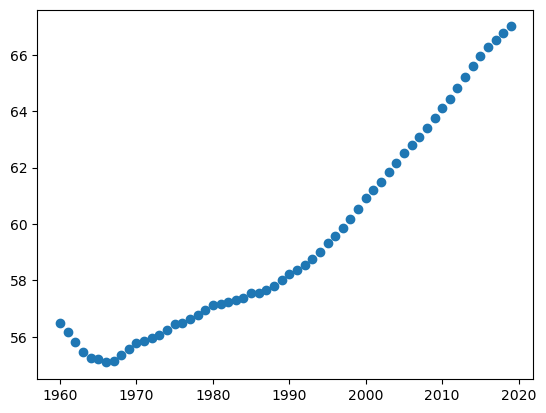

In [7]:
plt.scatter(X,y)

# Feature Scaling (Mandatory for SVR)**
SVR is highly sensitive to the range of data points. If we don't scale (normalize) the data, the model will fail to find the correct hyperplane.

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_scaled=sc_X.fit_transform(X)
print(X_scaled)


[[-1.7034199 ]
 [-1.64567685]
 [-1.5879338 ]
 [-1.53019075]
 [-1.47244771]
 [-1.41470466]
 [-1.35696161]
 [-1.29921857]
 [-1.24147552]
 [-1.18373247]
 [-1.12598942]
 [-1.06824638]
 [-1.01050333]
 [-0.95276028]
 [-0.89501723]
 [-0.83727419]
 [-0.77953114]
 [-0.72178809]
 [-0.66404504]
 [-0.606302  ]
 [-0.54855895]
 [-0.4908159 ]
 [-0.43307286]
 [-0.37532981]
 [-0.31758676]
 [-0.25984371]
 [-0.20210067]
 [-0.14435762]
 [-0.08661457]
 [-0.02887152]
 [ 0.02887152]
 [ 0.08661457]
 [ 0.14435762]
 [ 0.20210067]
 [ 0.25984371]
 [ 0.31758676]
 [ 0.37532981]
 [ 0.43307286]
 [ 0.4908159 ]
 [ 0.54855895]
 [ 0.606302  ]
 [ 0.66404504]
 [ 0.72178809]
 [ 0.77953114]
 [ 0.83727419]
 [ 0.89501723]
 [ 0.95276028]
 [ 1.01050333]
 [ 1.06824638]
 [ 1.12598942]
 [ 1.18373247]
 [ 1.24147552]
 [ 1.29921857]
 [ 1.35696161]
 [ 1.41470466]
 [ 1.47244771]
 [ 1.53019075]
 [ 1.5879338 ]
 [ 1.64567685]
 [ 1.7034199 ]]


In [9]:
sc_y=StandardScaler()
y_scaled=sc_y.fit_transform(y.reshape(-1,1))
print(y_scaled)

[[-0.81106651]
 [-0.89953531]
 [-1.00186558]
 [-1.09748032]
 [-1.1563009 ]
 [-1.16669445]
 [-1.20000003]
 [-1.18218007]
 [-1.12971887]
 [-1.06748437]
 [-1.00891857]
 [-0.9882298 ]
 [-0.9617088 ]
 [-0.92858561]
 [-0.88378994]
 [-0.8258396 ]
 [-0.81113676]
 [-0.77699903]
 [-0.73045784]
 [-0.68064672]
 [-0.63269584]
 [-0.62205118]
 [-0.6095382 ]
 [-0.59227218]
 [-0.5641253 ]
 [-0.52240615]
 [-0.51906348]
 [-0.49113538]
 [-0.44572098]
 [-0.39145346]
 [-0.33203402]
 [-0.29217894]
 [-0.24427871]
 [-0.18654872]
 [-0.11574122]
 [-0.03155736]
 [ 0.03715435]
 [ 0.11793874]
 [ 0.20884708]
 [ 0.30665278]
 [ 0.40865886]
 [ 0.48618311]
 [ 0.5720112 ]
 [ 0.6636633 ]
 [ 0.75852074]
 [ 0.85498626]
 [ 0.93397554]
 [ 1.01531945]
 [ 1.10010786]
 [ 1.19210808]
 [ 1.29337818]
 [ 1.38219145]
 [ 1.48619121]
 [ 1.59761643]
 [ 1.7047616 ]
 [ 1.80103807]
 [ 1.89231366]
 [ 1.96529151]
 [ 2.02848941]
 [ 2.09404133]]


# Splitting the dataset into the Training set and Test set

# Fitting SVR on 3 Different Kernel on dataset

In [10]:
from sklearn.svm import SVR
model_linear=SVR(kernel='linear')
model_linear.fit(X_scaled,y_scaled.ravel())

SVR(kernel='linear')

In [11]:
model_poly=SVR(kernel='poly',degree=3)
model_poly.fit(X_scaled,y_scaled.ravel())

SVR(kernel='poly')

In [12]:
model_rbf=SVR(kernel='rbf')
model_rbf.fit(X_scaled,y_scaled.ravel())

SVR()

Text(0, 0.5, 'Population')

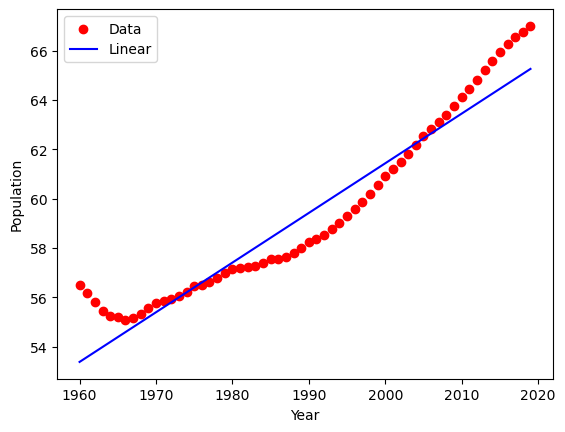

In [13]:
y_predict=model_linear.predict(X_scaled)
y_linear=sc_y.inverse_transform(y_predict.reshape(-1,1))
plt.scatter(X,y,color='red',label='Data')
plt.plot(X,y_linear,label='Linear',color='blue')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population')

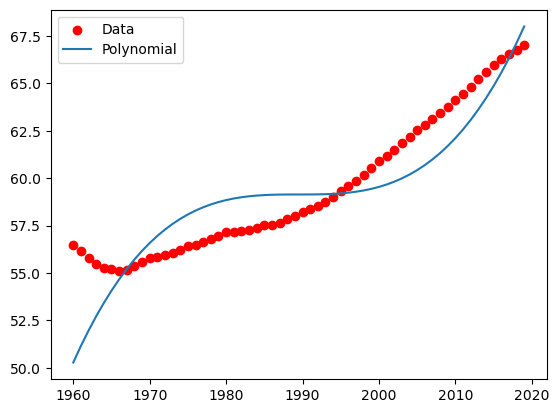

In [14]:
y_predict_poly=model_poly.predict(X_scaled)
y_poly=sc_y.inverse_transform(y_predict_poly.reshape(-1,1))
plt.scatter(X,y,label='Data',color='red')
plt.plot(X,y_poly,label='Polynomial')
plt.legend()

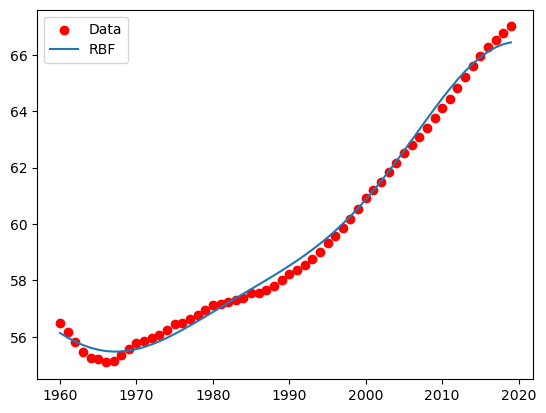

In [15]:
y_predict_rbf=model_rbf.predict(X_scaled)
y_rbf=sc_y.inverse_transform(y_predict_rbf.reshape(-1,1))
plt.scatter(X,y,label='Data',color='red')
plt.plot(X,y_rbf,label='RBF')
plt.legend()

# Predict the x_test using 3 Kernel

In [ ]:
model_rbf.score(x_train,y_train)

In [ ]:
model_rbf.score(x_test,y_test)

array([57.55350984, 59.31657719, 67.00381119, 57.81875323, 55.85676846,
       55.80745463, 59.012126, 66.7667425, 60.90862046, 57.22630775,
       55.24893881, 55.78194745, 58.22990246, 61.18898716, 58.75605047,
       61.83084479, 63.74196691, 55.15534672], dtype=object)

array([57.73445326, 59.30206118, 64.8451716 , 57.99812952, 55.96479236,
       56.12587167, 59.06485884, 64.91876466, 60.76906052, 57.24445561,
       55.93360816, 55.89821768, 58.29641078, 61.1088798 , 58.84682535,
       61.81299688, 63.81278461, 55.81527994])

# Visualising the  results

Text(0, 0.5, 'Population')

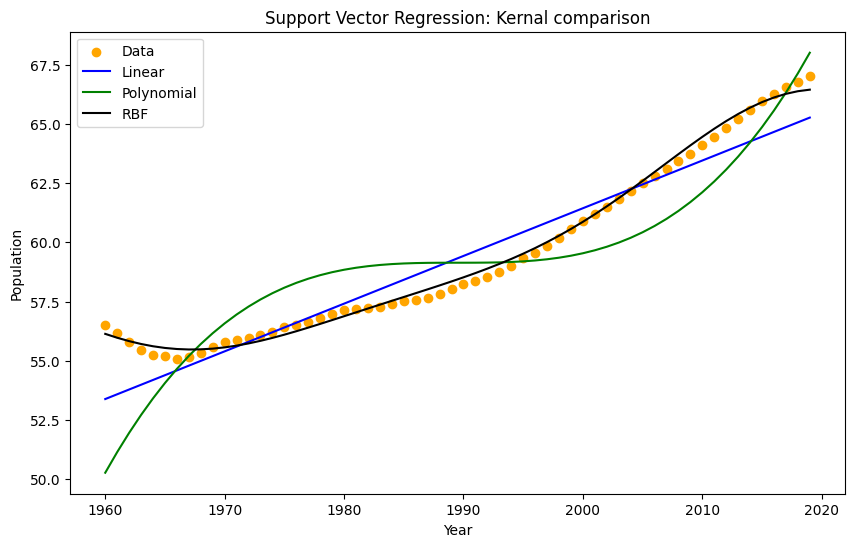

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,color='orange',label='Data')
plt.plot(X,y_linear,label='Linear',color='blue')
plt.plot(X,y_poly,label='Polynomial',color='green')
plt.plot(X,y_rbf,label='RBF',color='black')
plt.legend()
plt.title('Support Vector Regression: Kernal comparison')
plt.xlabel('Year')
plt.ylabel('Population')

### **Student Activity : Prediction**
**Task:** Predict the value for the Year **2025** (or value 6.5 in the demo data). 
Remember: You must transform the input before predicting, and inverse transform the output.

In [18]:
predicted = model_rbf.predict(sc_X.transform([[2025]]))

In [20]:
print("The predicted value for input 2025 is:", round(sc_y.inverse_transform(predicted.reshape(-1, 1))[0][0], 2))

The predicted value for input 2025 is: 65.91
